In [0]:
# Install tpot on the server
!pip install tpot

    100% |████████████████████████████████| 81kB 5.3MB/s 
    100% |████████████████████████████████| 942kB 23.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built deap stopit


https://colab.research.google.com/drive/1CIVn-GoOyY3H2_Bv8z09mkNRokQ9jlJ-#scrollTo=uhBlHuGpO2n6

http://www.randalolson.com/2016/05/08/tpot-a-python-tool-for-automating-data-science/

below cell is not working

In [0]:
#print(feature_data.head())

'''
X_trn = [ feature_data[i] for i in range(np.shape(feature_data)[0]) if feature_data[1]==0 ]
print(X_trn.shape)
y_trn = [ feature_data[i][-1] for i in range(np.shape(feature_data)[0]) if feature_data[1]==0 ]
print(y_trn.shape)

X_trn=np.where(feature_data[1]==0,feature_data)#[:,:-1]
y_trn=np.where(feature_data[1]==0)[:,-1]
print(X_trn.head())
print(X_trn.shape)
print(y_trn.shape)

X_val = [ feature_data[i][:-1] for i in range(np.shape(Data)[0]) if (feature_data[1]==1 and feature_data[2]<=6) ]
print(X_val.shape)
y_val = [ feature_data[i][-1] for i in range(np.shape(Data)[0]) if (feature_data[1]==1 and feature_data[2]<=6) ]
print(y_val.shape)

X_val=np.where((feature_data[1]==1 and feature_data[2]<=6))[:,:-1]
y_val=np.where((feature_data[1]==1 and feature_data[2]<=6))[:,-1]
print(X_val.head())
print(X_val.shape)
print(y_val.shape)

X_tst = [ feature_data[i][:-1] for i in range(np.shape(Data)[0]) if (feature_data[1]==1 and feature_data[2]>6 and feature_data[2]<=12) ]
print(X_trn.shape)
y_tst = [ feature_data[i][-1] for i in range(np.shape(Data)[0]) if (feature_data[1]==1 and feature_data[2]>6 and feature_data[2]<=12) ]
print(y_trn.shape)

X_tst=np.where((feature_data[1]==1 and feature_data[2]>6 and feature_data[2]<=12))[:,:-1]
y_tst=np.where((feature_data[1]==1 and feature_data[2]>6 and feature_data[2]<=12))[:,-1]
print(X_trn.head())
print(X_trn.shape)
print(y_trn.shape)'''

#another way which allso didn't work

'''
# pandas and numpy for data manipulation

Data=pda.DataFrame(pda.read_csv('hour.csv'))
feature_data=Data.iloc[:,2:]

for i in range(feature_data.shape[0]):
  if feature_data[1]==0:
    X_trn[i] = feature_data[i,:-1]
    y_trn[i] = feature_data[i,-1]
  
  elif feature_data[2]<=6:
    X_val[i] = feature_data[i,:-1]
    y_val[i] = feature_data[i,-1]
    
  else:#if feature_data[2]>6 and feature_data[2]<=12:
    X_tst[i] = feature_data[i,:-1]
    y_tst[i] = feature_data[i,-1]
    
print(X_trn.shape)
print(y_val.shape)
print(y_tst.head())'''



"\n# pandas and numpy for data manipulation\n\nData=pda.DataFrame(pda.read_csv('hour.csv'))\nfeature_data=Data.iloc[:,2:]\n\nfor i in range(feature_data.shape[0]):\n  if feature_data[1]==0:\n    X_trn[i] = feature_data[i,:-1]\n    y_trn[i] = feature_data[i,-1]\n  \n  elif feature_data[2]<=6:\n    X_val[i] = feature_data[i,:-1]\n    y_val[i] = feature_data[i,-1]\n    \n  else:#if feature_data[2]>6 and feature_data[2]<=12:\n    X_tst[i] = feature_data[i,:-1]\n    y_tst[i] = feature_data[i,-1]\n    \nprint(X_trn.shape)\nprint(y_val.shape)\nprint(y_tst.head())"

In [0]:
# Convert to numpy arrays
training_features = np.array(train_features)
testing_features = np.array(test_features)

# Sklearn wants the labels as one-dimensional vectors
training_targets = np.array(train_labels).reshape((-1,))
testing_targets = np.array(test_labels).reshape((-1,))

In [0]:
import pandas as pda
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
#from tpot import TPOTRegressor

X_data=pda.read_csv('hour.csv',usecols=[2,4,5,6,7,8,9,10,11,12,13])
y_data=pda.read_csv('hour.csv',usecols=[16])

X_trn, X_eval, y_trn, y_eval = train_test_split(X_data, y_data, test_size=0.2)
X_val, X_tst, y_val, y_tst = train_test_split(X_eval, y_eval, test_size=0.2)

'''X_trn=Data.iloc[0:8685,2:-1]
y_trn=Data.iloc[0:8685,-1]
print(X_trn.head())
X_val=Data.iloc[8685:13003,2:-1]
y_val=Data.iloc[8685:13003,-1]
X_tst=Data.iloc[13003:,2:-1]
y_tst=Data.iloc[13003:,-1]'''
print(X_trn.shape, y_trn.shape)
print(X_tst.shape, y_tst.shape)
print(X_val.shape, y_val.shape)

(13903, 11) (13903, 1)
(696, 11) (696, 1)
(2780, 11) (2780, 1)


In [0]:
#function that creates a column for every value it might have
def CreateColumnPerValue(data, columnList):
    for x in columnList:

        values=pd.unique(data[x])
        
        for v in values:
            column_name=x+"_"+str(v)   
            data[column_name]=(data[x]==v).astype(float)
    
        data.drop(x, axis=1, inplace=True)
      
train_dataset = pd.get_dummies(train_dataset,columns =categorical_features)
test_dataset = pd.get_dummies(test_dataset,columns =categorical_features)

Gao's v and h stack for reading

In [0]:
import pandas as pda
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
X=np.loadtxt(fname='hour.csv',delimiter=',',skiprows=1,usecols=(2,4,5,6,7,8,9,10,11,12,13))
y=np.loadtxt(fname='hour.csv',delimiter=',',skiprows=1,usecols=16,dtype='int')
n_half=math.floor(X.shape[0]/2)

temp=np.vstack((np.roll(y,1), np.roll(y,2), np.roll(y,3), np.roll(y,4), np.roll(y,5), np.roll(y,6), 
                np.roll(y,7), np.roll(y,8), np.roll(y,9), np.roll(y,10),np.roll(y,11),np.roll(y,12)))
X=np.hstack(( X, temp.T )); del temp
X_trn=X[:n_half];y_trn=y[:n_half]
X_val,X_tst,y_val,y_tst=train_test_split(X[n_half+1:],y[n_half+1:],test_size=0.4)


In [0]:

from sklearn.ensemble import RandomForestRegressor

#X = np.transpose([np.dot(X_trn,pca.components_[i]) for i in [0,1]])
#X[0] = np.dot(X_trn,pca.components_[0].reshape(-1,1)
#print(X.shape)

# Fit the tpot model on the training data
#tpot.fit(X_trn,y_trn)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LassoLarsCV
from math import sqrt
#from sklearn.pipeline import Pipeline

RFRparam_grid = [{'max_depth': [2,5,10,15,20,25]}]
rfr = GridSearchCV(RandomForestRegressor(random_state=0,n_estimators=500),RFRparam_grid, cv=5,scoring='neg_mean_squared_log_error')
#y_pred_rfr_val = rfr.predict(X_val)

for i in range(0,4):
  rfr.fit(X_trn[i:,:11+i],y_trn[i:])
  y_pred_rfr_val = rfr.predict(X_val[:, :11+i])
  y_pred_rfr_val[ np.where(y_pred_rfr_val<0) ]=0
  #y_pred_etr_val[y_pred_etr_val<0]=0
  rfr_neg_preds=y_val.shape[0] - np.count_nonzero(y_pred_rfr_val)
  print('RFR -ve predictions',rfr_neg_preds)
  rfr_rmsle=sqrt(mean_squared_log_error(y_val,y_pred_rfr_val))
  print('Root-mean-squared-log-error for ETR',rfr_rmsle)
  #y_pred_rfr_val[y_pred_rfr_val<0] = 0




RFR -ve predictions 0
Root-mean-squared-log-error for ETR 0.5351277921391423
RFR -ve predictions 0
Root-mean-squared-log-error for ETR 0.3269084786188115
RFR -ve predictions 0
Root-mean-squared-log-error for ETR 0.3278302976146239


ADAboost

In [0]:
'''for i in range(y_val.shape[0]):
  if y_pred_rfr_val[i]<0:
    y_pred_rfr_val[i] = 0
print(y_pred_rfr_val.shape)

rfr_neg_preds=y_val.shape[0] - np.count_nonzero(y_pred_rfr_val)
print('RF -ve prictions',rfr_neg_preds)
rfr_rmsle=sqrt(mean_squared_log_error(y_val,y_pred_rfr_val))
print('Root-mean-squared-log-error for RFR',rfr_rmsle)
'''
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import AdaBoostRegressor

ABRparam_grid = [{'learning_rate': [0.01,0.1,1,10]}]
abr = GridSearchCV(AdaBoostRegressor(),ABRparam_grid, cv=8)#.fit(X_trn, y_trn)
for i in range(0,15):
  abr.fit(X_trn[i:,:11+i],y_trn[i:])
  y_pred_abr_val = abr.predict(X_val[:, :11+i])
  y_pred_abr_val[ np.where(y_pred_abr_val<0) ]=0
  #y_pred_etr_val[y_pred_etr_val<0]=0
  #abr_neg_preds=y_val.shape[0] - np.count_nonzero(y_pred_rfr_val)
  #print('RFR -ve predictions',rfr_neg_preds)
  abr_rmsle=sqrt(mean_squared_log_error(y_val,y_pred_abr_val))
  print('Root-mean-squared-log-error for ABR',abr_rmsle)
  #y_pred_rfr_val[y_pred_rfr_val<0] = 0

  '''y_pred_abr_val = abr.predict(X_val)
#y_pred_abr_val[y_pred_abr_val<0]=0
for i in range(y_val.shape[0]):
  if y_pred_abr_val[i]<0:
    y_pred_abr_val[i] = 0
print(y_pred_abr_val.shape)
#y_pred_abr_val[y_pred_abr_val<0]=0
abr_neg_preds=y_val.shape[0] - np.count_nonzero(y_pred_abr_val)
print('AdaBoost -ve prictions',abr_neg_preds)
abr_rmsle=sqrt(mean_squared_log_error(y_val,y_pred_abr_val))
print('Root-mean-squared-log-error for ABR',abr_rmsle)



y_pred_llr_val= LassoLarsCV().fit(X_trn,y_trn).predict(X_val)
#y_pred_llr_val[y_pred_llr_val<0]=0
for i in range(y_val.shape[0]):
  if y_pred_llr_val[i]<0:
    y_pred_llr_val[i] = 0
print(y_pred_llr_val.shape)
llr_neg_preds = y_val.shape[0] - np.count_nonzero(y_pred_llr_val)
print('LLR -ve prictions',llr_neg_preds)
llr_rmsle=sqrt(mean_squared_log_error(y_val,y_pred_llr_val))
print('Root-mean-squared-log-error for LLR',llr_rmsle)

'''


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Root-mean-squared-log-error for ABR 0.8764554959528335
Root-mean-squared-log-error for ABR 0.6070125857533337
Root-mean-squared-log-error for ABR 0.5976741227941524
Root-mean-squared-log-error for ABR 0.5986493056679663
Root-mean-squared-log-error for ABR 0.5993886423401656


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Root-mean-squared-log-error for ABR 0.6014675656679238
Root-mean-squared-log-error for ABR 0.5928821904290388


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Root-mean-squared-log-error for ABR 0.5968376867702679
Root-mean-squared-log-error for ABR 0.5970899773563022
Root-mean-squared-log-error for ABR 0.594302878022036
Root-mean-squared-log-error for ABR 0.5948200590208245
Root-mean-squared-log-error for ABR 0.5955462535793721
Root-mean-squared-log-error for ABR 0.5986573831340947


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Root-mean-squared-log-error for ABR 0.5965588957316234
Root-mean-squared-log-error for ABR 0.5973952819214187


In [0]:
print(rfr.best_params_)

{'max_depth': 15}


In [0]:

import numpy as np
#y_test_pred = SVpipeline.predict(X_test_pred)
#y_final=(y_test_pred).astype(np.int64)
#print(y_final)
np.savetxt('predictions.txt', tpot.predict(X_tst), fmt='%d', delimiter='\n', encoding=None)

#,y_tst))

In [0]:
#from sklearn.metrics.pairwise import euclidean_distances as dist2
#error = sum(abs(tpot.predict(X_tst) - y_tst))
print(sum(abs(tpot.predict(X_tst) - y_tst)))
print(sum(abs(tpot.predict(X_val) - y_val)))


1.5093348793016048e-10
1.4529177860822529e-10


In [0]:
from sklearn.ensemble import ExtraTreesRegressor as ETR
ETRparam_grid = [{'max_depth':[2,5,10,15,20,25]}]
etr = GridSearchCV(ETR(n_estimators=500), ETRparam_grid, iid=False, cv=8,scoring='neg_mean_squared_log_error')

#Bagpp=Pipeline([('Bag',BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100))])
for i in range(0,10):
  etr.fit(X_trn[i:,:11+i],y_trn[i:])
  y_pred_etr_val = etr.predict(X_val[:, :11+i])
  y_pred_etr_val[ np.where(y_pred_etr_val<0) ]=0
  #y_pred_etr_val[y_pred_etr_val<0]=0
  etr_neg_preds=y_val.shape[0] - np.count_nonzero(y_pred_etr_val)
  print('ETR with',i,'time delays has',etr_neg_preds,' -ve predictions')
  etr_rmsle=sqrt(mean_squared_log_error(y_val,y_pred_etr_val))
  print('Root-mean-squared-log-error for ETR',etr_rmsle)
  #print("dt={},ValErr={}\n".format(i,valErr))
                    
'''
import xgboost 
from xgboost import XGBRegressor
XGBRparam_grid = [{'gamma':[0,0.03,0.1,0.3], 'learning_rate':[0.1,0.07], 'max_depth':[2,5,10,15,20,25], 'n_estimators':[1000] , 'reg_alpha':[1e-5, 1e-2,  0.75], 'reg_lambda':[1e-5, 1e-2, 0.45]}]
xgbr = GridSearchCV(XBGRegressor(), XGBRparam_grid, iid=False, cv=8,scoring='neg_mean_squared_log_error').fit(X_trn, y_trn)
y_pred_xgbr_val = abr.predict(X_val)
y_pred_xgbr_val[y_pred_xgbr_val<0]=0
xgbr_neg_preds=y_val.shape[0] - np.count_nonzero(y_pred_xgbr_val)
print('XGBoost -ve predictions',xgbr_neg_preds)
xgbr_rmsle=sqrt(mean_squared_log_error(y_val,y_pred_xgbr_val))
print('Root-mean-squared-log-error for XGBR',xgbr_rmsle)
'''



ETR with 0 time delays has 0  -ve predictions
Root-mean-squared-log-error for ETR 0.5227179122515656
ETR with 1 time delays has 0  -ve predictions
Root-mean-squared-log-error for ETR 0.3435796679237422
ETR with 2 time delays has 0  -ve predictions
Root-mean-squared-log-error for ETR 0.34294684935845426


KeyboardInterrupt: ignored

In [0]:
! git clone https://github.com/pgmpy/pgmpy 
! cd pgmpy/
! pip install -r requirements.txt
! python setup.py install

Cloning into 'pgmpy'...
remote: Enumerating objects: 13222, done.
remote: Total 13222 (delta 0), reused 0 (delta 0), pack-reused 13222
Receiving objects: 100% (13222/13222), 6.29 MiB | 24.77 MiB/s, done.
Resolving deltas: 100% (9253/9253), done.
Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
python3: can't open file 'setup.py': [Errno 2] No such file or directory


Below is Gao idea of using embedding to avoid data reshaping to 3 d

In [0]:
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

ep=2

X=np.loadtxt(fname='hour.csv',delimiter=',',skiprows=1,usecols=(2,4,5,6,7,8,9,10,11,12,13))
y=np.loadtxt(fname='hour.csv',delimiter=',',skiprows=1,usecols=16,dtype='int')
n_half=math.floor(X.shape[0]/1.1)

X_trn=X[:n_half];y_trn=y[:n_half]
X_val,X_tst,y_val,y_tst=train_test_split(X[n_half+1:],y[n_half+1:],test_size=0.2)
'''
X_trn_scaled = MinMaxScaler().fit_transform(X_trn)
X_tst_scaled = MinMaxScaler().fit_transform(X_tst)
y_trn_scaled = MinMaxScaler().fit_transform(y_trn.reshape((-1,1)))
y_tst_scaled = MinMaxScaler().fit_transform(y_tst.reshape((-1,1)))
X_val_scaled = MinMaxScaler().fit_transform(X_val)
y_val_scaled = MinMaxScaler().fit_transform(y_val.reshape((-1,1)))
'''
lstm=kr.Sequential()
#--I just added this:
lstm.add(kr.layers.Embedding(11,output_dim=1000))
#---------------------
lstm.add(kr.layers.CuDNNLSTM(units=1000))
lstm.add(kr.layers.Dense(units=1))

opt=kr.optimizers.SGD()
rmsle=kr.losses.MeanSquaredLogarithmicError()

lstm.compile(loss=rmsle, optimizer=opt)#, metrics=['mean_squared_error'])
'''
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]
'''
#for i in range(0,10):
  #lstm.fit(X_trn[i:,:11+i],y_trn[i:], epochs=20, verbose=2, validation_data=(X_val,y_val), use_multiprocessing=True)
#stm.fit(X_trn[3:,:14],y_trn[3:], epochs=7, verbose=2, validation_data=(X_val,y_val), use_multiprocessing=True)
lstm.fit(X_trn,y_trn, epochs=17, verbose=2, validation_data=(X_val,y_val), use_multiprocessing=True)
  
y_pred_lstm_tst = lstm.predict(X_tst) #[:, :14])

y_pred_lstm_tst[ np.where(y_pred_lstm_tst<0) ]=0
  #y_pred_etr_val[y_pred_etr_val<0]=0
lstm_neg_preds=y_tst.shape[0] - np.count_nonzero(y_pred_lstm_tst)
print('LSTM with 3 time delays has',lstm_neg_preds,' -ve predictions')
lstm_rmsle=math.sqrt(mean_squared_log_error(y_tst,y_pred_lstm_tst))
print('Root-mean-squared-log-error for LSTM',lstm_rmsle)

print(lstm.summary())


Train on 15799 samples, validate on 1263 samples
Epoch 1/17
 - 7s - loss: 3.0320 - val_loss: 2.0681
Epoch 2/17
 - 5s - loss: 2.0328 - val_loss: 2.0143
Epoch 3/17
 - 5s - loss: 2.0169 - val_loss: 2.0073
Epoch 4/17
 - 5s - loss: 2.0154 - val_loss: 2.0061
Epoch 5/17
 - 6s - loss: 2.0151 - val_loss: 2.0056
Epoch 6/17
 - 6s - loss: 2.0151 - val_loss: 2.0055
Epoch 7/17
 - 5s - loss: 2.0150 - val_loss: 2.0054
Epoch 8/17
 - 5s - loss: 2.0149 - val_loss: 2.0055
Epoch 9/17
 - 5s - loss: 2.0148 - val_loss: 2.0053
Epoch 10/17
 - 5s - loss: 2.0148 - val_loss: 2.0055
Epoch 11/17
 - 5s - loss: 2.0147 - val_loss: 2.0053
Epoch 12/17
 - 5s - loss: 2.0147 - val_loss: 2.0051
Epoch 13/17
 - 5s - loss: 2.0146 - val_loss: 2.0051
Epoch 14/17
 - 5s - loss: 2.0146 - val_loss: 2.0052
Epoch 15/17
 - 5s - loss: 2.0145 - val_loss: 2.0052
Epoch 16/17
 - 5s - loss: 2.0144 - val_loss: 2.0050
Epoch 17/17
 - 5s - loss: 2.0144 - val_loss: 2.0047
LSTM with 3 time delays has 0  -ve predictions
Root-mean-squared-log-error f

In [0]:
#lstm.predict(X_test)
result = lstm.evaluate(X_tst,y_tst) #x=np.expand_dims(X_tst, axis=0), y=np.expand_dims(y_tst, axis=0))

print("loss (test-set):", result)

316/316 [==============================] - 0s 112us/sample - loss: 1.8277
loss (test-set): 1.827699765374389


Below is Gao's new version without embedding

In [0]:
# working RNN
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
import sys
from sklearn.preprocessing import MinMaxScaler


def DataReshape(X,y):  
#data Reshaped as X=(batch_size,timesteps,data_dim) y=(batch_size,data_dim)
  
  #X = MinMaxScaler().fit_transform(X)
  X = np.reshape(X, (X.shape[0], X.shape[1], 1 ))
  #y = MinMaxScaler().fit_transform(y.reshape((1,-1)))
  y = np.reshape(y, (y.size, 1))
  return X,y

#X=np.loadtxt(fname='hour.csv',delimiter=',',skiprows=1,usecols=(2,4,5,6,7,8,9,10,11,12,13))
y=np.loadtxt(fname='hour.csv',delimiter=',',skiprows=1,usecols=16,dtype='int')
n_half=math.floor(y.shape[0]/2)

temp=np.vstack((np.roll(y,1), np.roll(y,2), np.roll(y,3), np.roll(y,4), np.roll(y,5), np.roll(y,6), 
                np.roll(y,7), np.roll(y,8), np.roll(y,9), np.roll(y,10),np.roll(y,11),np.roll(y,12)))
X=np.asarray(temp.T); del temp

X_trn=X[:n_half];y_trn=y[:n_half]
X_val,X_tst,y_val,y_tst=train_test_split(X[n_half+1:],y[n_half+1:],test_size=0.4)

X_trn,y_trn=DataReshape(X_trn,y_trn)
X_val,y_val=DataReshape(X_val,y_val)
X_tst,y_tst=DataReshape(X_tst,y_tst)

lstm=kr.Sequential()
lstm.add(kr.layers.CuDNNLSTM(units=512,input_shape=(X_trn.shape[1],1)))
lstm.add(kr.layers.Dense(units=1))

opt=kr.optimizers.Adam()
rmsle=kr.losses.MeanSquaredLogarithmicError()

lstm.compile(loss=rmsle, optimizer=opt)

lstm.fit(x=X_trn, y=y_trn, epochs=50, validation_data=(X_val,y_val), verbose=2, use_multiprocessing=True)
print(lstm.summary())

'''
Here I just let it learn from y(t-i). Maybe we can try to let it learn from X(t-i)??

I used MSLE to avoid errors. The ValErr need to be squared to get what we want.

The result is not very well. We can try to improve it by increasing 'epochs'. Someone use epochs=100~500 for their RNN

'''

#lstm.fit(X_trn,y_trn, epochs=17, verbose=2, validation_data=(X_val,y_val), use_multiprocessing=True)
  
y_pred_lstm_tst = lstm.predict(X_tst) #[:, :14])

y_pred_lstm_tst[ np.where(y_pred_lstm_tst<0) ]=0
  #y_pred_etr_val[y_pred_etr_val<0]=0
lstm_neg_preds=y_tst.shape[0] - np.count_nonzero(y_pred_lstm_tst)
print('LSTM with 3 time delays has',lstm_neg_preds,' -ve predictions')
lstm_rmsle=math.sqrt(mean_squared_log_error(y_tst,y_pred_lstm_tst))
print('Root-mean-squared-log-error for LSTM',lstm_rmsle)

print(lstm.summary())



Train on 8689 samples, validate on 5213 samples
Epoch 1/50
 - 3s - loss: 2.1795 - val_loss: 1.7167
Epoch 2/50
 - 2s - loss: 0.7047 - val_loss: 1.0908
Epoch 3/50
 - 2s - loss: 0.4757 - val_loss: 0.8247
Epoch 4/50
 - 2s - loss: 0.3781 - val_loss: 0.6915
Epoch 5/50
 - 2s - loss: 0.3208 - val_loss: 0.5911
Epoch 6/50
 - 2s - loss: 0.2855 - val_loss: 0.5208
Epoch 7/50
 - 2s - loss: 0.2589 - val_loss: 0.4934
Epoch 8/50
 - 2s - loss: 0.2479 - val_loss: 0.4542
Epoch 9/50
 - 2s - loss: 0.2263 - val_loss: 0.4062
Epoch 10/50
 - 2s - loss: 0.2071 - val_loss: 0.3756
Epoch 11/50
 - 2s - loss: 0.1942 - val_loss: 0.3722
Epoch 12/50
 - 2s - loss: 0.1832 - val_loss: 0.3459
Epoch 13/50
 - 2s - loss: 0.1790 - val_loss: 0.3217
Epoch 14/50
 - 2s - loss: 0.1714 - val_loss: 0.3146
Epoch 15/50
 - 2s - loss: 0.1622 - val_loss: 0.3050
Epoch 16/50
 - 2s - loss: 0.1582 - val_loss: 0.3246
Epoch 17/50
 - 2s - loss: 0.1523 - val_loss: 0.2859
Epoch 18/50
 - 2s - loss: 0.1482 - val_loss: 0.2563
Epoch 19/50
 - 2s - loss:

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
 
.......... .......... .......... .......... .......... 
.......... .......... .......... .......... .......... 
.......... .......... .......... .......... ..........
The best result is 0.38285765384145304
LSTM with 3 time delays has 0  -ve predictions
Root-mean-squared-log-error for LSTM 0.39355774767146834


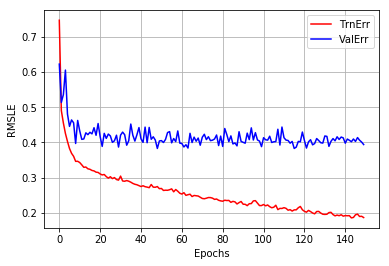

In [0]:
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

class PrintDot(kr.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print(' ',end='')
    if epoch % 50 == 0: print('')
    print('.', end='')

def DataProcess(data,label,timesteps=1):
  batch_size=label.size
  n_feature=data.shape[1]
  data_dim=n_feature+1
  label=np.reshape(label,(batch_size,1))
  X=np.zeros((batch_size,timesteps,data_dim))
  
  for i in range(timesteps):
    dt=i+1
    X[:,i,:]=np.hstack(( np.roll(data,dt,axis=0), np.roll(label,dt,axis=0) ))
    
  return X[timesteps:,:,:],label[timesteps:]
#----------------  
timesteps=3

X=np.loadtxt(fname='hour.csv',delimiter=',',skiprows=1,usecols=(2,4,5,6,7,8,9,10,11,12,13))
y=np.loadtxt(fname='hour.csv',delimiter=',',skiprows=1,usecols=16)
data_dim=X.shape[1]+1
n_half=math.floor(y.shape[0]/2)

X,y=DataProcess(X,y,timesteps)

X_trn=X[:n_half];y_trn=y[:n_half]
X_val,X_tst,y_val,y_tst=train_test_split(X[n_half+1:],y[n_half+1:],test_size=0.4)

#----------------
lstm=kr.Sequential()
lstm.add(kr.layers.CuDNNGRU(units=512,input_shape=(timesteps,data_dim)))
lstm.add(kr.layers.Dense(units=512))
lstm.add(kr.layers.Dense(units=1))

opt=kr.optimizers.Nadam()
rmsle=kr.losses.MeanSquaredLogarithmicError()

lstm.compile(loss=rmsle, optimizer=opt)#, metrics=['mean_squared_error'])

h=lstm.fit(x=X_trn, y=y_trn, epochs=150, validation_data=(X_val,y_val), verbose=0, callbacks=[PrintDot()], use_multiprocessing=True) #validation_data=(X_val,y_val),

plt.plot(h.epoch,np.sqrt(h.history['loss']),'r-')
plt.plot(h.epoch,np.sqrt(h.history['val_loss']),'b-')
plt.xlabel('Epochs'); plt.ylabel('RMSLE')
plt.grid(True)
plt.legend(['TrnErr','ValErr'])

ValErr_best=np.min(h.history['val_loss'])
print("\nThe best result is {}".format(np.sqrt(ValErr_best)))

y_pred_lstm_tst = lstm.predict(X_tst) #[:, :14])

y_pred_lstm_tst[ np.where(y_pred_lstm_tst<0) ]=0
  #y_pred_etr_val[y_pred_etr_val<0]=0
lstm_neg_preds=y_tst.shape[0] - np.count_nonzero(y_pred_lstm_tst)
print('LSTM with 3 time delays has',lstm_neg_preds,' -ve predictions')
lstm_rmsle=math.sqrt(mean_squared_log_error(y_tst,y_pred_lstm_tst))
print('Root-mean-squared-log-error for LSTM',lstm_rmsle)